In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data_orders=pd.read_csv('data_orders.csv')
data_orders.head()

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0
1,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0
2,12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0
3,13:50:20,-1.054671,51.460544,658.0,3000582941169,4,1,62.0
4,21:24:45,-0.967605,51.458236,NaN,3000583140877,9,0,NaN


In [4]:
data_orders.shape

(10716, 8)

#### Data offer CSV Analysis
 order_gk: order number associated with the "orders" dataset
 offer_id: ID of an offer

In [5]:
# reading the data offers
data_offers=pd.read_csv('data_offers.csv')
data_offers.head()

,order_gk,offer_id
0,3000579625629,300050936206
1,3000627306450,300052064651
2,3000632920686,300052408812
3,3000632771725,300052393030
4,3000583467642,300051001196


In [6]:
data_offers.shape

(334363, 2)

#### Data cleaning and Preparation

In [7]:
data_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10716 entries, 0 to 10715
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_datetime                 10716 non-null  object 
 1   origin_longitude               10716 non-null  float64
 2   origin_latitude                10716 non-null  float64
 3   m_order_eta                    2814 non-null   float64
 4   order_gk                       10716 non-null  int64  
 5   order_status_key               10716 non-null  int64  
 6   is_driver_assigned_key         10716 non-null  int64  
 7   cancellations_time_in_seconds  7307 non-null   float64
dtypes: float64(4), int64(3), object(1)
memory usage: 669.9+ KB


In [8]:
data_orders.isnull().sum() # checking for null values in the data 


order_datetime                      0
origin_longitude                    0
origin_latitude                     0
m_order_eta                      7902
order_gk                            0
order_status_key                    0
is_driver_assigned_key              0
cancellations_time_in_seconds    3409
dtype: int64

As per the dataset, we can see that data points order_status_key and is_driver_assigned_key aren't traditional forms of explanatory data points and rather indicate to an internal data marking system which could lead to communication of jargon. So, we replace these data entry points with their literal string meanings.

In [9]:
data_orders['is_driver_assigned']=np.where(data_orders['is_driver_assigned_key']==1,"Yes","No")
data_orders['order_status']=np.where(data_orders['order_status_key']==4, "Client Cancelled", "System Rejected")

# removing redundant data
data_orders.drop(columns=['is_driver_assigned_key','order_status_key'], inplace=True)


In [11]:
# checking for updated changes
data_orders.head()

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,cancellations_time_in_seconds,is_driver_assigned,order_status
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,198.0,Yes,Client Cancelled
1,20:57:32,-0.950385,51.456843,NaN,3000583116437,128.0,No,Client Cancelled
2,12:07:50,-0.969520,51.455544,477.0,3000582891479,46.0,Yes,Client Cancelled
3,13:50:20,-1.054671,51.460544,658.0,3000582941169,62.0,Yes,Client Cancelled
4,21:24:45,-0.967605,51.458236,NaN,3000583140877,NaN,No,System Rejected


As per the problem statement we require the failure of orders by hour  so we can clean order_datatime to extract the hour component 

In [13]:
data_orders['order_datetime'].dtype

dtype('O')

In [14]:
# since the datetime is stored as stype object, we extract
# the hour component simply by splitting the string
data_orders['order_hour']=data_orders['order_datetime'].str.split(":").apply(lambda time : time[0])
data_orders.head()

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,cancellations_time_in_seconds,is_driver_assigned,order_status,order_hour
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,198.0,Yes,Client Cancelled,18
1,20:57:32,-0.950385,51.456843,NaN,3000583116437,128.0,No,Client Cancelled,20
2,12:07:50,-0.969520,51.455544,477.0,3000582891479,46.0,Yes,Client Cancelled,12
3,13:50:20,-1.054671,51.460544,658.0,3000582941169,62.0,Yes,Client Cancelled,13
4,21:24:45,-0.967605,51.458236,NaN,3000583140877,NaN,No,System Rejected,21


In [15]:
data_orders_cleaned=data_orders.drop(columns=['order_datetime','origin_longitude','origin_latitude', 'm_order_eta'])
data_orders_cleaned.head()

,order_gk,cancellations_time_in_seconds,is_driver_assigned,order_status,order_hour
0,3000583041974,198.0,Yes,Client Cancelled,18
1,3000583116437,128.0,No,Client Cancelled,20
2,3000582891479,46.0,Yes,Client Cancelled,12
3,3000582941169,62.0,Yes,Client Cancelled,13
4,3000583140877,NaN,No,System Rejected,21


In [16]:
data_orders_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10716 entries, 0 to 10715
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_gk                       10716 non-null  int64  
 1   cancellations_time_in_seconds  7307 non-null   float64
 2   is_driver_assigned             10716 non-null  object 
 3   order_status                   10716 non-null  object 
 4   order_hour                     10716 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 418.7+ KB


Since, our analysis requires average plot of cancellations_time_in_seconds, we will be filling the missing data values with average based on order_hour and is_driver_assigned

In [17]:
data_orders_cleaned['cancellations_time_in_seconds']=data_orders_cleaned['cancellations_time_in_seconds'].fillna(data_orders_cleaned.groupby(['order_hour','is_driver_assigned'])['cancellations_time_in_seconds'].transform('mean'))
data_orders_cleaned.head()

,order_gk,cancellations_time_in_seconds,is_driver_assigned,order_status,order_hour
0,3000583041974,198.000000,Yes,Client Cancelled,18
1,3000583116437,128.000000,No,Client Cancelled,20
2,3000582891479,46.000000,Yes,Client Cancelled,12
3,3000582941169,62.000000,Yes,Client Cancelled,13
4,3000583140877,113.959821,No,System Rejected,21


In [24]:
def cancellation_type(row):
    if row["order_status"] == "Client Cancelled":
        if row["is_driver_assigned"] == "Yes":
            return "Cancelled After Assignment"
        else:
            return "Cancelled Before Assignment"
    else:
        return "System Rejected"
    


In [ ]:
data_orders_cleaned["cancellation_category"] = data_orders_cleaned.apply(cancellation_type, axis=1)
data_orders_cleaned.head()

,order_gk,cancellations_time_in_seconds,is_driver_assigned,order_status,order_hour,cancellation_category
0,3000583041974,198.000000,Yes,Client Cancelled,18,Cancelled After Assignment
1,3000583116437,128.000000,No,Client Cancelled,20,Cancelled Before Assignment
2,3000582891479,46.000000,Yes,Client Cancelled,12,Cancelled After Assignment
3,3000582941169,62.000000,Yes,Client Cancelled,13,Cancelled After Assignment
4,3000583140877,113.959821,No,System Rejected,21,System Rejected


Creating separate ETA dataset

In [18]:
eta_column={'order_eta':data_orders['m_order_eta'],'order_hour': data_orders['order_hour']}
eta_dataframe=pd.DataFrame(data=eta_column)
eta_dataframe.head()

,order_eta,order_hour
0,60.0,18
1,NaN,20
2,477.0,12
3,658.0,13
4,NaN,21


In [19]:
eta_dataframe=eta_dataframe.dropna()

In [20]:
eta_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2814 entries, 0 to 10715
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   order_eta   2814 non-null   float64
 1   order_hour  2814 non-null   object 
dtypes: float64(1), object(1)
memory usage: 66.0+ KB


In [27]:
cancel_dist=data_orders_cleaned['cancellation_category'].value_counts()
print(cancel_dist)

cancellation_category
Cancelled Before Assignment    4496
System Rejected                3409
Cancelled After Assignment     2811
Name: count, dtype: int64


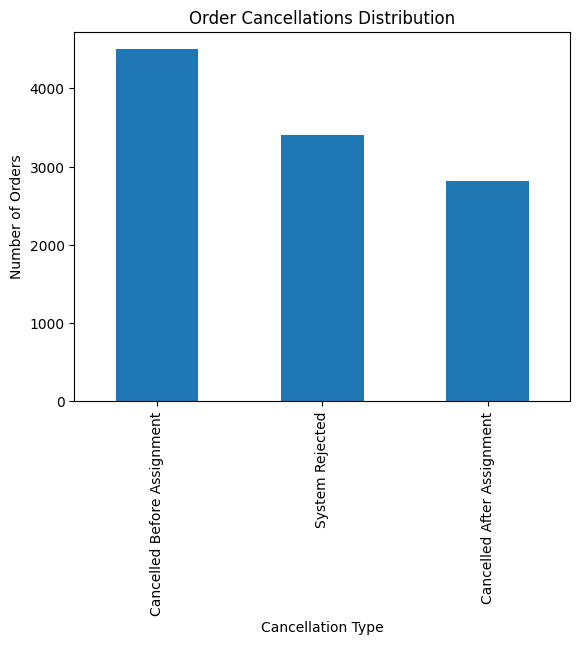

In [ ]:
plt.figure()
cancel_dist.plot(kind="bar")
plt.title("Order Cancellations Distribution")
plt.ylabel("Number of Orders")
plt.xlabel("Cancellation Type")
plt.show()


In [26]:
eta_dataframe.to_excel('C:\\Users\\Mahender\\Downloads\\modules_assignment\\BA_PROJECTS\\eta_only.xlsx')
data_orders_cleaned.to_excel('C:\\Users\\Mahender\\Downloads\\modules_assignment\\BA_data_orders_cleaned.xlsx')
